In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("COVID-19-jp/newly_confirmed_cases_daily.csv")
df["Date"] = pd.to_datetime(df["Date"] )
print(len(df))
df.tail()

1044


,Date,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
1039,2022-11-20,77757,5747,902,843,2622,693,1057,1984,2147,...,630,180,2224,501,443,740,546,381,427,262
1040,2022-11-21,42461,3812,536,534,1696,326,624,931,1240,...,283,151,666,163,231,441,343,199,218,156
1041,2022-11-22,121460,11394,1956,2115,3719,1848,2207,3341,1689,...,1251,587,2956,996,859,1555,869,750,681,443
1042,2022-11-23,133361,10943,1606,1820,4439,1583,2041,3191,2487,...,962,525,3609,792,770,1241,940,738,669,558
1043,2022-11-24,60108,4895,673,680,2726,299,661,1355,1194,...,316,174,1339,211,343,418,543,279,284,250


### 最新の日付を取得

In [3]:
latest_date = df["Date"].max()
latest_date_str = latest_date.strftime("%Y-%m-%d")

In [4]:
all_jp = df[["Date","ALL"]]
all_jp.tail()

,Date,ALL
1039,2022-11-20,77757
1040,2022-11-21,42461
1041,2022-11-22,121460
1042,2022-11-23,133361
1043,2022-11-24,60108


In [5]:
df.columns.values

array(['Date', 'ALL', 'Hokkaido', 'Aomori', 'Iwate', 'Miyagi', 'Akita',
       'Yamagata', 'Fukushima', 'Ibaraki', 'Tochigi', 'Gunma', 'Saitama',
       'Chiba', 'Tokyo', 'Kanagawa', 'Niigata', 'Toyama', 'Ishikawa',
       'Fukui', 'Yamanashi', 'Nagano', 'Gifu', 'Shizuoka', 'Aichi', 'Mie',
       'Shiga', 'Kyoto', 'Osaka', 'Hyogo', 'Nara', 'Wakayama', 'Tottori',
       'Shimane', 'Okayama', 'Hiroshima', 'Yamaguchi', 'Tokushima',
       'Kagawa', 'Ehime', 'Kochi', 'Fukuoka', 'Saga', 'Nagasaki',
       'Kumamoto', 'Oita', 'Miyazaki', 'Kagoshima', 'Okinawa'],
      dtype=object)

### 都道府県の列だけにする

In [6]:
prefs_h = df.drop("ALL", axis=1)
prefs_h.tail()

,Date,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
1039,2022-11-20,5747,902,843,2622,693,1057,1984,2147,1544,...,630,180,2224,501,443,740,546,381,427,262
1040,2022-11-21,3812,536,534,1696,326,624,931,1240,735,...,283,151,666,163,231,441,343,199,218,156
1041,2022-11-22,11394,1956,2115,3719,1848,2207,3341,1689,2443,...,1251,587,2956,996,859,1555,869,750,681,443
1042,2022-11-23,10943,1606,1820,4439,1583,2041,3191,2487,2692,...,962,525,3609,792,770,1241,940,738,669,558
1043,2022-11-24,4895,673,680,2726,299,661,1355,1194,856,...,316,174,1339,211,343,418,543,279,284,250


### 都道府県での横持を縦持ちに変換

In [7]:
prefs_h.set_index(["Date"]).tail()

,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,Gunma,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2022-11-20,5747,902,843,2622,693,1057,1984,2147,1544,1518,...,630,180,2224,501,443,740,546,381,427,262
2022-11-21,3812,536,534,1696,326,624,931,1240,735,695,...,283,151,666,163,231,441,343,199,218,156
2022-11-22,11394,1956,2115,3719,1848,2207,3341,1689,2443,2678,...,1251,587,2956,996,859,1555,869,750,681,443
2022-11-23,10943,1606,1820,4439,1583,2041,3191,2487,2692,2533,...,962,525,3609,792,770,1241,940,738,669,558
2022-11-24,4895,673,680,2726,299,661,1355,1194,856,1035,...,316,174,1339,211,343,418,543,279,284,250


In [8]:
prefs_h.set_index(["Date"]).stack().tail()

Date                 
2022-11-24  Kumamoto     418
            Oita         543
            Miyazaki     279
            Kagoshima    284
            Okinawa      250
dtype: int64

In [9]:

prefs_h.set_index(["Date"]).stack().reset_index().tail()

,Date,level_1,0
49063,2022-11-24,Kumamoto,418
49064,2022-11-24,Oita,543
49065,2022-11-24,Miyazaki,279
49066,2022-11-24,Kagoshima,284
49067,2022-11-24,Okinawa,250


In [10]:
prefs = prefs_h.set_index(["Date"]).stack().reset_index()
prefs.columns=["Date","Pref","Confirmed"]
prefs.tail()

,Date,Pref,Confirmed
49063,2022-11-24,Kumamoto,418
49064,2022-11-24,Oita,543
49065,2022-11-24,Miyazaki,279
49066,2022-11-24,Kagoshima,284
49067,2022-11-24,Okinawa,250


### 7日間移動平均を計算

In [11]:
prefs["Confirmed7DaysMA"] = prefs["Confirmed"].rolling(7).mean()
all_jp["Confirmed7DaysMA"] = all_jp["ALL"].rolling(7).mean()
prefs.tail()

/tmp/ipykernel_32758/2392883738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_jp["Confirmed7DaysMA"] = all_jp["ALL"].rolling(7).mean()


,Date,Pref,Confirmed,Confirmed7DaysMA
49063,2022-11-24,Kumamoto,418,428.857143
49064,2022-11-24,Oita,543,477.714286
49065,2022-11-24,Miyazaki,279,472.428571
49066,2022-11-24,Kagoshima,284,488.142857
49067,2022-11-24,Okinawa,250,332.571429


### 直近の９０日間のデータを抽出

In [12]:
import datetime
recent_date = pd.to_datetime(datetime.datetime.now()).round("D")- datetime.timedelta(days=90)
all_jp_recent = all_jp.loc[all_jp["Date"]>=recent_date]

### 死者数のデータを読み取り

In [13]:
df = pd.read_csv("COVID-19-jp/number_of_deaths_daily.csv")
df["Date"] = pd.to_datetime(df["Date"] )
print(len(df))
df.tail()

930


,Date,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
925,2022-11-20,122,23,1,4,9,1,1,0,2,...,3,6,3,0,2,3,0,0,0,0
926,2022-11-21,57,5,3,3,6,2,0,0,0,...,0,0,1,0,1,0,0,0,0,0
927,2022-11-22,144,31,1,2,2,1,0,6,3,...,2,3,1,0,1,1,0,1,2,0
928,2022-11-23,160,34,6,3,5,6,0,5,1,...,1,0,3,3,2,0,2,1,0,1
929,2022-11-24,130,17,3,4,6,4,3,0,3,...,1,0,2,1,0,2,1,1,0,0


In [14]:
death = df[["Date", "ALL"]]
death["Confirmed7DaysMA"] = death["ALL"].rolling(7).mean()
death_recent = death.loc[death["Date"]>=recent_date]

/tmp/ipykernel_32758/4107577123.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  death["Confirmed7DaysMA"] = death["ALL"].rolling(7).mean()


### グラフを描画

In [15]:
import matplotlib.pyplot as plt
import japanize_matplotlib


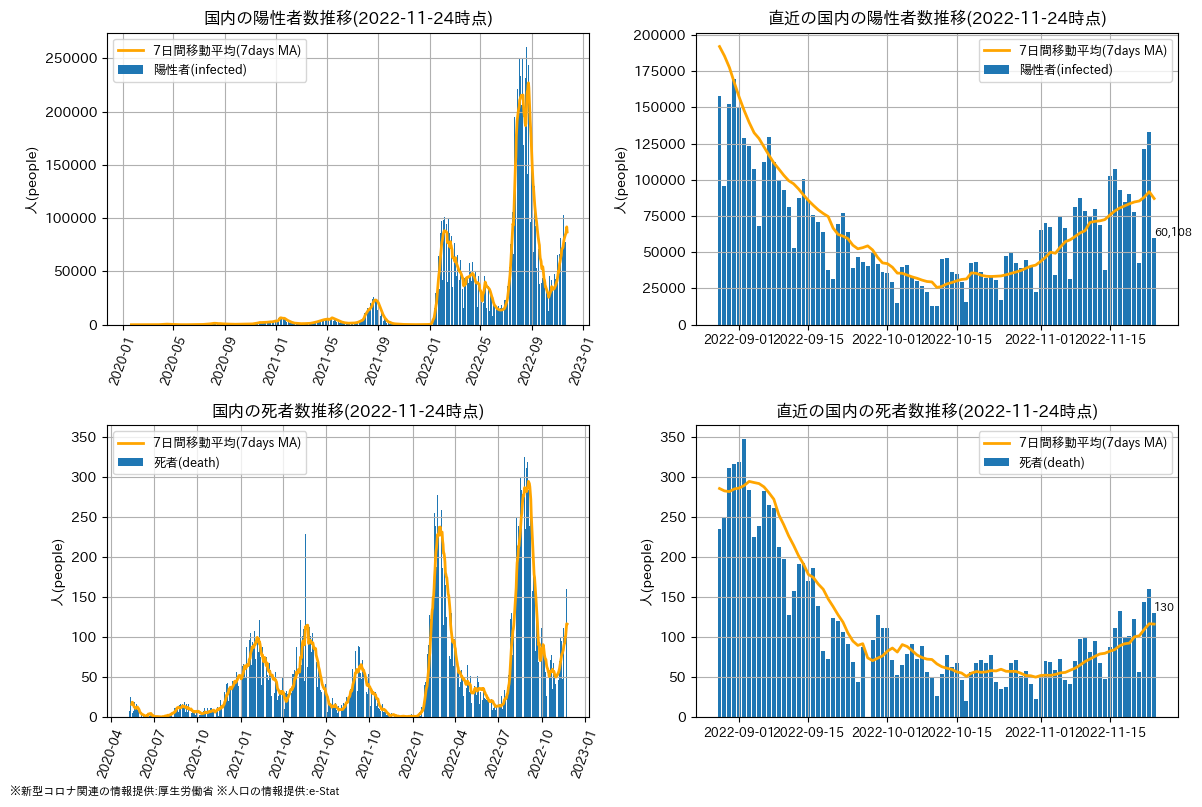

In [16]:
fig = plt.figure(figsize=(12,8))

plt.subplot(2,2,1) # (rows, columns, panel number)
plt.title("国内の陽性者数推移({}時点)".format(latest_date_str))
plt.bar(all_jp["Date"],all_jp["ALL"],label="陽性者(infected)")
# plt.bar(severe["Date"],severe["Severe cases"],label="重症者(severe)")
plt.plot_date(all_jp["Date"],all_jp["Confirmed7DaysMA"],label="7日間移動平均(7days MA)", fmt="-",lw=2.0, color="orange")
plt.tick_params(axis="x",rotation=70, labelsize=9)
plt.ylabel("人(people)")
plt.grid()
plt.legend(fontsize=9)

plt.subplot(2,2,2) # (rows, columns, panel number)
plt.title("直近の国内の陽性者数推移({}時点)".format(latest_date_str))
plt.bar(all_jp_recent["Date"],all_jp_recent["ALL"],label="陽性者(infected)")
# plt.bar(severe_recent["Date"],severe_recent["Severe cases"],label="重症者数(severe)")
plt.plot_date(all_jp_recent["Date"],all_jp_recent["Confirmed7DaysMA"],label="7日間移動平均(7days MA)", fmt="-",lw=2.0, color="orange")
plt.tick_params(axis="x",labelsize=9)
plt.ylabel("人(people)")
plt.grid()
latest_date = all_jp_recent["Date"].max()
latest_value = all_jp_recent.loc[all_jp_recent["Date"]==latest_date,"ALL"].iloc[0]
plt.text(latest_date,latest_value ,"{:,}".format(latest_value),fontsize=8,va="bottom")
#latest_value = severe_recent.loc[severe_recent["Date"]==latest_date,"Severe cases"].iloc[0]
#plt.text(latest_date,latest_value ,"{:,}".format(latest_value),fontsize=8,va="bottom",ha="left")
plt.legend(fontsize=9)

plt.subplot(2,2,3) # (rows, columns, panel number)
plt.title("国内の死者数推移({}時点)".format(latest_date_str))
plt.bar(death["Date"],death["ALL"],label="死者(death)")
plt.plot_date(death["Date"],death["Confirmed7DaysMA"],label="7日間移動平均(7days MA)", fmt="-",lw=2.0, color="orange")
plt.tick_params(axis="x",rotation=70, labelsize=9)
plt.ylabel("人(people)")
plt.grid()
plt.legend(fontsize=9)

plt.subplot(2,2,4) # (rows, columns, panel number)
plt.title("直近の国内の死者数推移({}時点)".format(latest_date_str))
plt.bar(death_recent["Date"],death_recent["ALL"],label="死者(death)")
plt.plot_date(death_recent["Date"],death_recent["Confirmed7DaysMA"],label="7日間移動平均(7days MA)", fmt="-",lw=2.0, color="orange")
plt.tick_params(axis="x",labelsize=9)
plt.ylabel("人(people)")
plt.grid()
latest_date = death_recent["Date"].max()
latest_value = death_recent.loc[death_recent["Date"]==latest_date,"ALL"].iloc[0]
# latest_value = death_recent.loc[death_recent["Date"]==latest_date,"ALL"]
plt.text(latest_date,latest_value ,"{:,}".format(latest_value),fontsize=8,va="bottom")
plt.legend(fontsize=9)

fig.text(0,0,"※新型コロナ関連の情報提供:厚生労働省 ※人口の情報提供:e-Stat",fontsize=8)


fig.tight_layout()


In [17]:
fig.savefig("out/covid-gov-domestic-daily.png")